1. Criar um projeto completo de visão computacional
    - O projeto deverá resolver algum problema real, de preferência o que já foi utilizado nos trabalhos anteriores;
    - A metodologia do projeto deverá ser detalhada com todas as etapas necessárias: dados, pre-processamento, segmentação, extração de características, experimentos realizados, avaliação dos resultados.
    - Será obrigatório o uso de Redes Neurais Convolucionais: Treinados do Zero, Pré-treinadas; e utilizando Fine-Tuning;
2. A partir do projeto concluído, deverá ser elaborado um artigo de até 10 páginas.
    - Deverá ser utilizado a template de artigos da SBC;
    - O artigo deverá conter: introdução, trabalhos relacionados, metodologia, resultados e discussão, e conclusão;
    - A metodologia deverá contar todos os detalhes necessários que garantam a reprodutibilidade do trabalho;
    - Fluxogramas, gráficos, tabelas, resultados visuais (casos de acerto e falha) são essenciais no artigo;
    - A discussão deverá elencar os motivos pelos quais o métodos chegou aos resultados apresentados. Além disso, essa seção deverá apresentar as principais limitações do trabalho desenvolvido.
3. As apresentações dos trabalhos serão dia 07/02/2024.
    - Cada aluno deverá criar uma apresentação de slides, simulando uma apresentação em um congresso;
    - O apresentador terá até 10 min para apresentar seu trabalho, e a plateia terá até 5 min para realizar questionamentos.
4. Todos os códigos deverão estar disponibilizados em algum sistema de controle de versão (GitHub, GitLab, etc.)
5. Cada autor deverá informar para qual congresso irá enviar o trabalho.

In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Diretórios das imagens
pasta_normal = r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\normal"
pasta_glioma = r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\glioma_tumor"

# Função para carregar e preparar as imagens
def carregar_imagens(pasta, classe):
    imagens = []
    labels = []
    for filename in os.listdir(pasta):
        if filename.endswith('.jpg'):
            img = load_img(os.path.join(pasta, filename), target_size=(224, 224))
            img_array = img_to_array(img) / 255.0  # Normalização
            imagens.append(img_array)
            labels.append(classe)
    return np.array(imagens), np.array(labels)

# Carregar imagens de glioma
imagens_glioma, labels_glioma = carregar_imagens(pasta_glioma, 1)

# Carregar imagens normais
imagens_normais, labels_normais = carregar_imagens(pasta_normal, 0)

# Juntar as imagens e os labels
imagens = np.concatenate((imagens_glioma, imagens_normais), axis=0)
labels = np.concatenate((labels_glioma, labels_normais), axis=0)

# Embaralhar as imagens e os labels
indices = np.arange(imagens.shape[0])
np.random.shuffle(indices)
imagens = imagens[indices]
labels = labels[indices]

print("Forma das imagens:", imagens.shape)
print("Forma dos labels:", labels.shape)

Forma das imagens: (800, 224, 224, 3)
Forma dos labels: (800,)


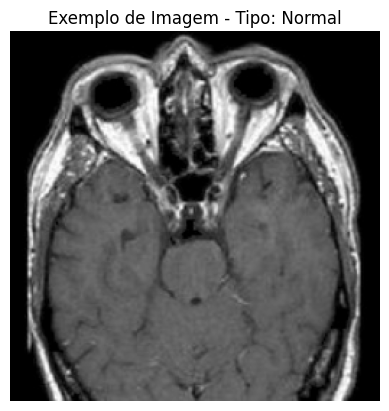

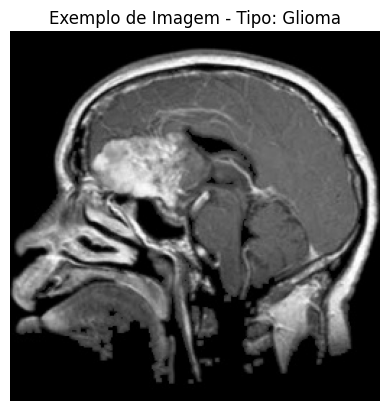

In [14]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Diretórios das imagens
pasta_normal = r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\normal"
pasta_glioma = r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\glioma_tumor"

# Função para exibir uma imagem de exemplo de uma pasta
def exibir_exemplo_imagem(pasta, tipo):
    for filename in os.listdir(pasta):
        if filename.endswith('.jpg'):
            caminho_imagem = os.path.join(pasta, filename)
            imagem = Image.open(caminho_imagem)
            plt.imshow(imagem)
            plt.title(f'Exemplo de Imagem - Tipo: {tipo}')
            plt.axis('off')
            plt.show()
            break  # Mostrar apenas a primeira imagem encontrada
    else:
        print("Nenhuma imagem encontrada na pasta:", pasta)

# Exibir exemplo de imagem de cada pasta
exibir_exemplo_imagem(pasta_normal, "Normal")
exibir_exemplo_imagem(pasta_glioma, "Glioma")


Exemplos de imagens normais:


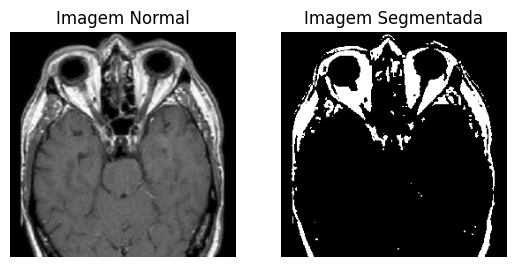

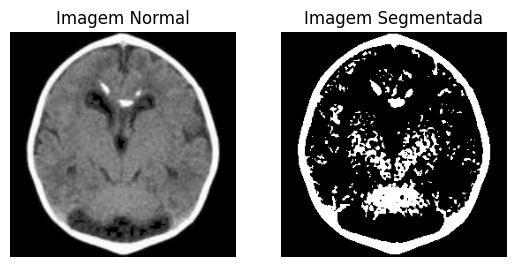

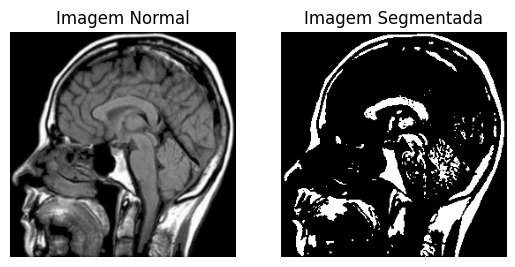

Exemplos de imagens com glioma:


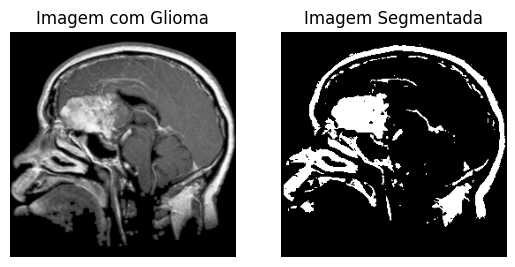

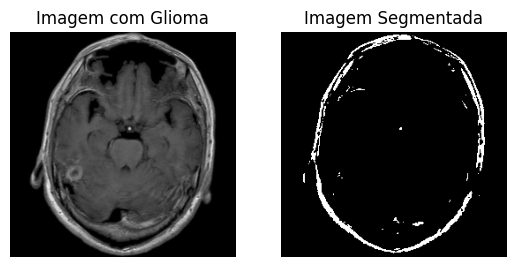

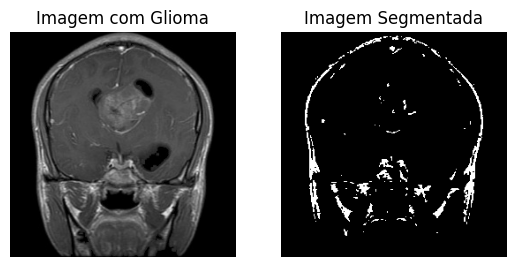

Imagens segmentadas salvas com sucesso!


In [15]:
import cv2
import os
import matplotlib.pyplot as plt

# Função para segmentar uma imagem usando limiarização
def segmentar_imagem(imagem):
    # Converter para escala de cinza
    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    # Aplicar limiarização
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return binary

# Diretórios das imagens
pasta_normal = r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\normal"
pasta_glioma = r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\glioma_tumor"

# Diretórios de destino das imagens segmentadas
pasta_destino_normal = r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\normal_segmentada"
pasta_destino_glioma = r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\glioma_segmentada"

# Exibir exemplos de imagens normais
count = 0
print("Exemplos de imagens normais:")
for filename in os.listdir(pasta_normal):
    if filename.endswith('.jpg') and count < 3:
        count += 1
        imagem = cv2.imread(os.path.join(pasta_normal, filename))
        imagem_segmentada = segmentar_imagem(imagem)
        # Exibir a imagem original e a imagem segmentada
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
        plt.title('Imagem Normal')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(imagem_segmentada, cmap='gray')
        plt.title('Imagem Segmentada')
        plt.axis('off')
        plt.show()
    elif count >= 3:
        break

# Exibir exemplos de imagens com glioma
count = 0
print("Exemplos de imagens com glioma:")
for filename in os.listdir(pasta_glioma):
    if filename.endswith('.jpg') and count < 3:
        count += 1
        imagem = cv2.imread(os.path.join(pasta_glioma, filename))
        imagem_segmentada = segmentar_imagem(imagem)
        # Exibir a imagem original e a imagem segmentada
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
        plt.title('Imagem com Glioma')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(imagem_segmentada, cmap='gray')
        plt.title('Imagem Segmentada')
        plt.axis('off')
        plt.show()
    elif count >= 3:
        break

# Criar diretórios de destino se não existirem
if not os.path.exists(pasta_destino_normal):
    os.makedirs(pasta_destino_normal)
if not os.path.exists(pasta_destino_glioma):
    os.makedirs(pasta_destino_glioma)

# Segmentar imagens normais e salvar em pasta_destino_normal
for filename in os.listdir(pasta_normal):
    if filename.endswith('.jpg'):
        imagem = cv2.imread(os.path.join(pasta_normal, filename))
        imagem_segmentada = segmentar_imagem(imagem)
        cv2.imwrite(os.path.join(pasta_destino_normal, filename), imagem_segmentada)

# Segmentar imagens de glioma e salvar em pasta_destino_glioma
for filename in os.listdir(pasta_glioma):
    if filename.endswith('.jpg'):
        imagem = cv2.imread(os.path.join(pasta_glioma, filename))
        imagem_segmentada = segmentar_imagem(imagem)
        cv2.imwrite(os.path.join(pasta_destino_glioma, filename), imagem_segmentada)

print("Imagens segmentadas salvas com sucesso!")

13/13: Indica que foram processados 13 lotes de dados.

131s 10s/step: Esta parte indica a velocidade do processamento. O número antes do "s" (segundos) indica o tempo total decorrido até o momento para processar os 13 lotes. O número após o "s/step" indica a média de tempo por lote, ou seja, quanto tempo em média levou para processar um lote.

foram processados 13 lotes de dados, com um tempo total de processamento de aproximadamente 129 segundos e uma média de cerca de 10 segundos por lote para as imagens do normal e 122 segundos e media de 9 segundos por lote para o glioma.

In [16]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
import os
import cv2
import numpy as np

# Função para carregar as imagens de uma pasta e suas respectivas labels
def carregar_imagens_da_pasta(pasta):
    imagens = []
    rotulos = []
    for nome_arquivo in os.listdir(pasta):
        img = cv2.imread(os.path.join(pasta, nome_arquivo))
        if img is not None:
            imagens.append(img)
            rotulos.append(1 if pasta.endswith('glioma_tumor') or pasta.endswith('glioma_segmentada') else 0)
    return imagens, rotulos

def main():
    # Carregar as imagens e suas respectivas labels
    imagens = []
    rotulos = []
    pastas = [
        r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\normal",
        r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\glioma_tumor",
        r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\normal_segmentada",
        r"C:\Users\Vc682\Downloads\notebook_TrabalhoFinal_Visao\notebook\glioma_segmentada"
    ]

    for pasta in pastas:
        imgs, lbls = carregar_imagens_da_pasta(pasta)
        imagens.extend(imgs)
        rotulos.extend(lbls)

    # Converter para numpy array
    imagens = np.array(imagens)
    rotulos = np.array(rotulos)

    # Redimensionar as imagens para 128x128 pixels
    linhas_img, cols_img = 128, 128
    imagens_redimensionadas = [cv2.resize(img, (linhas_img, cols_img)) for img in imagens]
    imagens_redimensionadas = np.array(imagens_redimensionadas)

    # Dividir o dataset em conjuntos de treinamento e teste
    treinoX, testeX, treinoY, testeY = train_test_split(imagens_redimensionadas, rotulos, test_size=0.3, random_state=42)

    linhas_img, cols_img = 128, 128

    # Construir a Rede Neural
    modelo = Sequential()
    modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(linhas_img, cols_img, 3)))
    modelo.add(MaxPooling2D((2, 2)))
    modelo.add(Conv2D(64, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D((2, 2)))
    modelo.add(Conv2D(64, (3, 3), activation='relu'))
    modelo.add(Flatten())
    modelo.add(Dense(64, activation='relu'))
    modelo.add(Dense(1, activation='sigmoid'))

    # Compilar o modelo
    modelo.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

    # Treinar o modelo
    modelo.fit(treinoX, treinoY, epochs=10, batch_size=32, validation_data=(testeX, testeY))

    # Avaliar o modelo
    perda, acuracia = modelo.evaluate(testeX, testeY)
    print(f'Perda do teste: {perda}')
    print(f'Acurácia do teste: {acuracia}')

if __name__ == "__main__":
    main()


Epoch 1/10
35/35 [==============================] - 22s 587ms/step - loss: 17.6583 - accuracy: 0.5455 - val_loss: 0.4867 - val_accuracy: 0.7646
Epoch 2/10
35/35 [==============================] - 19s 553ms/step - loss: 0.4239 - accuracy: 0.7902 - val_loss: 0.3806 - val_accuracy: 0.8271
Epoch 3/10
35/35 [==============================] - 19s 543ms/step - loss: 0.2196 - accuracy: 0.9045 - val_loss: 0.3750 - val_accuracy: 0.8667
Epoch 4/10
35/35 [==============================] - 19s 544ms/step - loss: 0.1391 - accuracy: 0.9455 - val_loss: 0.3857 - val_accuracy: 0.8708
Epoch 5/10
35/35 [==============================] - 19s 554ms/step - loss: 0.0851 - accuracy: 0.9661 - val_loss: 0.4239 - val_accuracy: 0.8917
Epoch 6/10
35/35 [==============================] - 20s 581ms/step - loss: 0.0549 - accuracy: 0.9777 - val_loss: 0.4015 - val_accuracy: 0.8938
Epoch 7/10
35/35 [==============================] - 20s 586ms/step - loss: 0.0260 - accuracy: 0.9911 - val_loss: 0.4716 - val_accuracy: 0.906

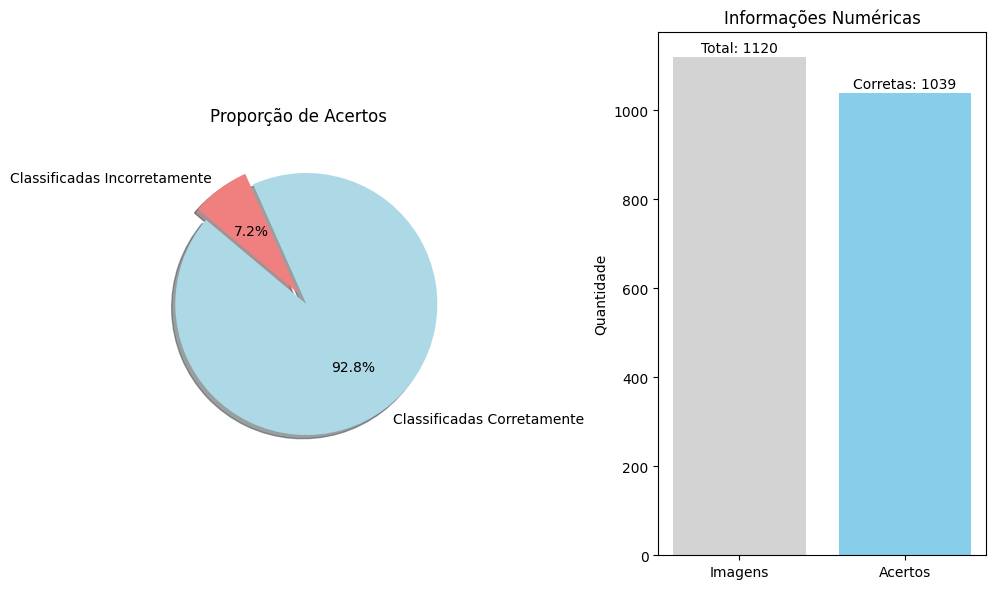

In [17]:
import matplotlib.pyplot as plt

# Definindo os dados
total_images = 1120
acuracia = 0.92791

# Calculando o número de imagens corretamente classificadas
imagens_corretas = int(acuracia * total_images)

# Calculando o número de imagens incorretas
imagens_incorretas = total_images - imagens_corretas

# Criando um gráfico de pizza
labels = ['Classificadas Corretamente', 'Classificadas Incorretamente']
sizes = [imagens_corretas, imagens_incorretas]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode a 1st slice

plt.figure(figsize=(10, 6))

# Gráfico de pizza
plt.subplot(1, 2, 1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proporção de Acertos')

# Adicionando informações numéricas
plt.subplot(1, 2, 2)
plt.bar(['Imagens', 'Acertos'], [total_images, imagens_corretas], color=['lightgray', 'skyblue'])
plt.text(0, total_images + 10, f'Total: {total_images}', ha='center', fontsize=10)
plt.text(1, imagens_corretas + 10, f'Corretas: {imagens_corretas}', ha='center', fontsize=10)
plt.title('Informações Numéricas')
plt.ylabel('Quantidade')

# Mostrando os gráficos
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# Dados fornecidos
dados = {
    'Perda do teste': [0.3042442202568054, 0.3194810152053833, 0.29769596457481384, 0.3541211187839508, 0.3100705146789551, 0.28326019644737244, 0.25139501690864563, 0.35458359122276306, 0.505662739276886, 0.3529524803161621],
    'Acurácia do teste': [0.9208333492279053, 0.9333333373069763, 0.9291666746139526, 0.925000011920929, 0.9437500238418579, 0.9229166507720947, 0.9333333373069763, 0.9291666746139526, 0.9125000238418579, 0.9291666746139526]
}

# Criando o DataFrame
df = pd.DataFrame(dados)

# Definindo o índice para começar do 1
df.index = range(1, 11)

# Exibindo o DataFrame
df


,Perda do teste,Acurácia do teste
1,0.304244,0.920833
2,0.319481,0.933333
3,0.297696,0.929167
4,0.354121,0.925000
5,0.310071,0.943750
6,0.283260,0.922917
7,0.251395,0.933333
8,0.354584,0.929167
9,0.505663,0.912500
10,0.352952,0.929167
